In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import time
import shutil
import pathlib
import itertools
import matplotlib.image as mpimg
import cv2
import seaborn as sns
import time
import tensorflow as tf

In [2]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from PIL import Image

In [3]:
import os
for dirname, _, filenames in os.walk('melanoma-cancer-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

melanoma-cancer-dataset\test\Benign\6299.jpg
melanoma-cancer-dataset\test\Benign\6300.jpg
melanoma-cancer-dataset\test\Benign\6301.jpg
melanoma-cancer-dataset\test\Benign\6302.jpg
melanoma-cancer-dataset\test\Benign\6303.jpg
melanoma-cancer-dataset\test\Benign\6304.jpg
melanoma-cancer-dataset\test\Benign\6305.jpg
melanoma-cancer-dataset\test\Benign\6306.jpg
melanoma-cancer-dataset\test\Benign\6307.jpg
melanoma-cancer-dataset\test\Benign\6308.jpg
melanoma-cancer-dataset\test\Benign\6309.jpg
melanoma-cancer-dataset\test\Benign\6310.jpg
melanoma-cancer-dataset\test\Benign\6311.jpg
melanoma-cancer-dataset\test\Benign\6312.jpg
melanoma-cancer-dataset\test\Benign\6313.jpg
melanoma-cancer-dataset\test\Benign\6314.jpg
melanoma-cancer-dataset\test\Benign\6315.jpg
melanoma-cancer-dataset\test\Benign\6316.jpg
melanoma-cancer-dataset\test\Benign\6317.jpg
melanoma-cancer-dataset\test\Benign\6318.jpg
melanoma-cancer-dataset\test\Benign\6319.jpg
melanoma-cancer-dataset\test\Benign\6320.jpg
melanoma-c

In [4]:
malignant_dir = 'melanoma-cancer-dataset/train/Malignant'
benign_dir = 'melanoma-cancer-dataset/train/Benign'

In [5]:
def load_image_paths_labels(malignant_dir, benign_dir):
    malignant_images = [(os.path.join(malignant_dir, img), 'Malignant') for img in os.listdir(malignant_dir)]
    benign_images = [(os.path.join(benign_dir, img), 'Benign') for img in os.listdir(benign_dir)]
    images_labels = malignant_images + benign_images
    return images_labels

In [6]:
image_data = load_image_paths_labels(malignant_dir, benign_dir)

In [7]:
df = pd.DataFrame(image_data, columns=['image_path', 'label'])

In [8]:
df.head()

,image_path,label
0,melanoma-cancer-dataset/train/Malignant\1.jpg,Malignant
1,melanoma-cancer-dataset/train/Malignant\10.jpg,Malignant
2,melanoma-cancer-dataset/train/Malignant\100.jpg,Malignant
3,melanoma-cancer-dataset/train/Malignant\1000.jpg,Malignant
4,melanoma-cancer-dataset/train/Malignant\1001.jpg,Malignant


In [9]:
df.tail()

,image_path,label
11874,melanoma-cancer-dataset/train/Benign\995.jpg,Benign
11875,melanoma-cancer-dataset/train/Benign\996.jpg,Benign
11876,melanoma-cancer-dataset/train/Benign\997.jpg,Benign
11877,melanoma-cancer-dataset/train/Benign\998.jpg,Benign
11878,melanoma-cancer-dataset/train/Benign\999.jpg,Benign


In [10]:
df.shape

(11879, 2)

In [11]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [14]:
df['label'].unique()

array(['Malignant', 'Benign'], dtype=object)

In [15]:
df['label'].value_counts()

label
Benign       6289
Malignant    5590
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_5088\82091035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette='hls')


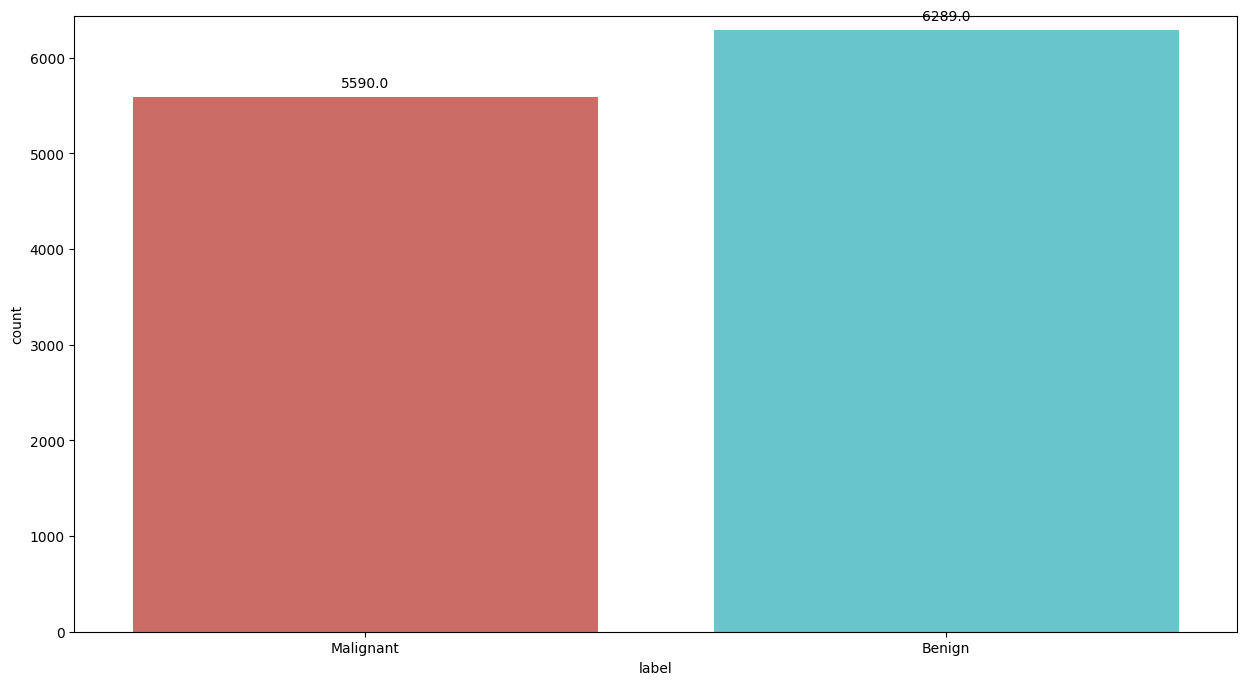

In [16]:
plt.figure(figsize=(15, 8))  

ax = sns.countplot(x='label', data=df, palette='hls')
ax.set_ylim(0, df['label'].value_counts().max() + 150)  

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 10),  
                textcoords='offset points', ha='center', va='center')

plt.show()

In [17]:
label_counts = df['label'].value_counts()

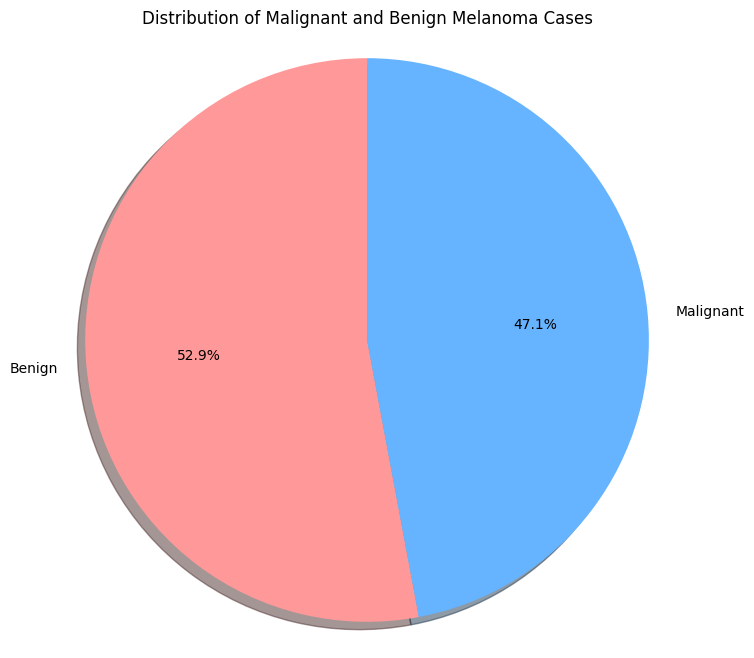

In [18]:
plt.figure(figsize=(8, 8)) 

plt.pie(label_counts, 
        labels=label_counts.index, 
        autopct='%1.1f%%',          
        startangle=90,             
        colors=['#ff9999','#66b3ff'], 
        shadow=True)           

plt.axis('equal')  
plt.title('Distribution of Malignant and Benign Melanoma Cases')
plt.show()

In [19]:
malignant_images = os.listdir(malignant_dir)
benign_images = os.listdir(benign_dir)

malignant_sample = np.random.choice(malignant_images, 5, replace=False)
benign_sample = np.random.choice(benign_images, 5, replace=False)

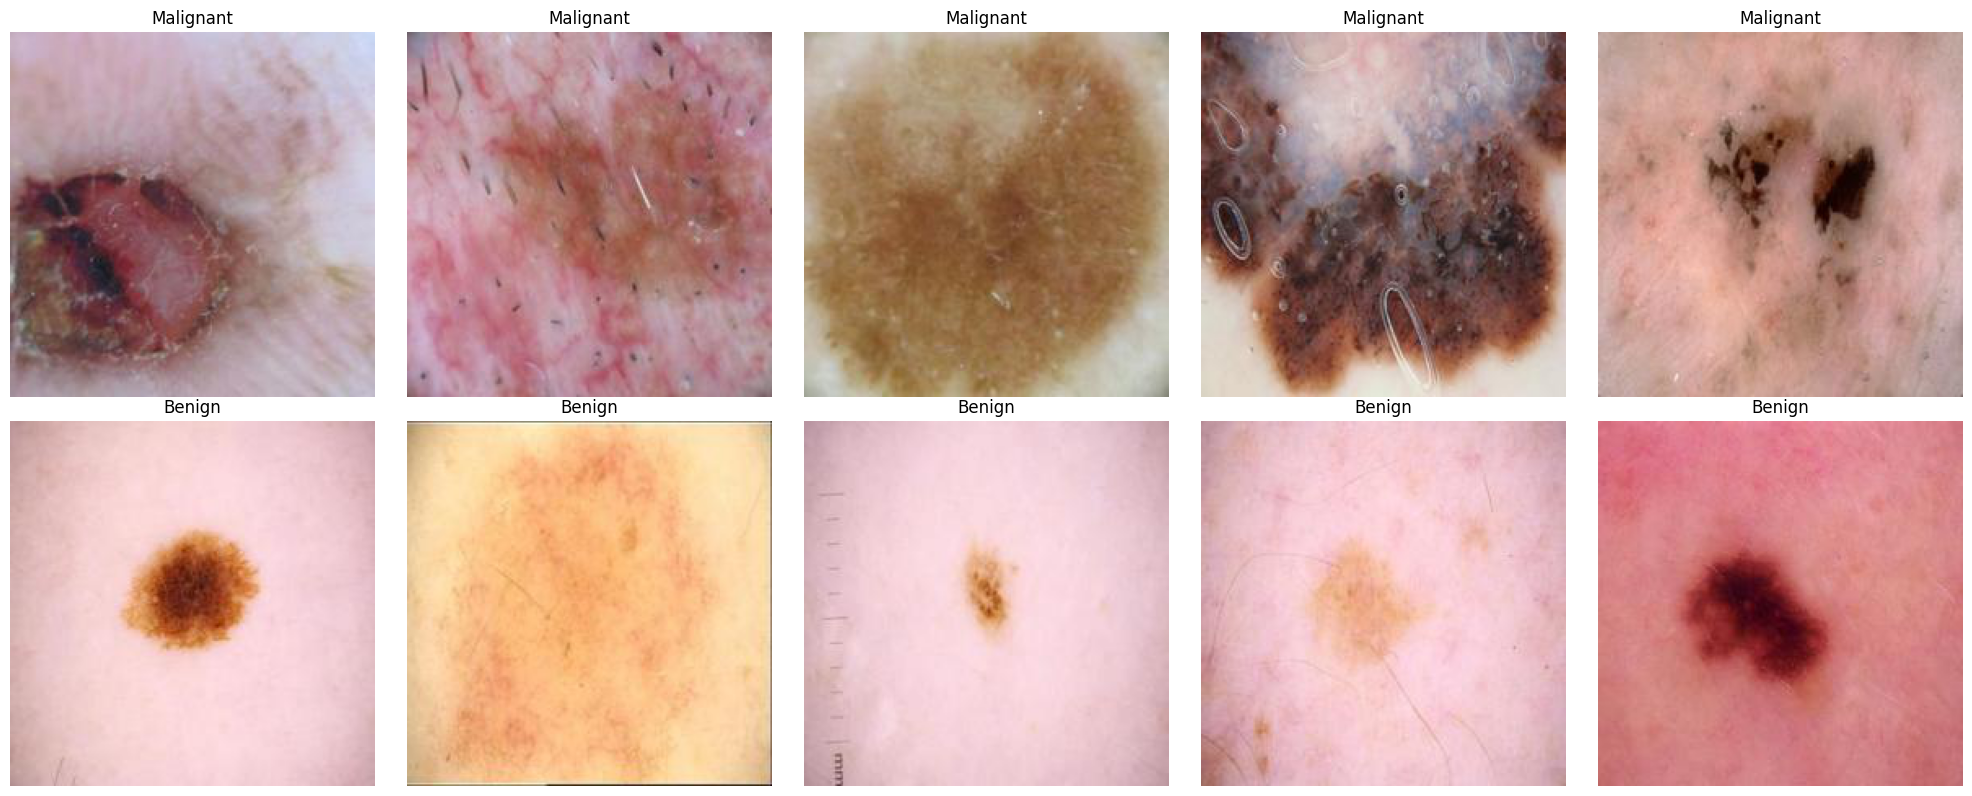

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8)) 

for ax, img_name in zip(axes[0], malignant_sample):
    img_path = os.path.join(malignant_dir, img_name)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')  
    ax.set_title('Malignant')

for ax, img_name in zip(axes[1], benign_sample):
    img_path = os.path.join(benign_dir, img_name)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')  
    ax.set_title('Benign')

plt.tight_layout()
plt.show()

In [21]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['label'])

In [22]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['label'] = y_resampled

In [23]:
print("\nClass distribution after oversampling:")
print(df_resampled['label'].value_counts())


Class distribution after oversampling:
label
Malignant    6289
Benign       6289
Name: count, dtype: int64


In [24]:
sns.set_style('darkgrid')

In [25]:
import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [26]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['label']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label'] 
)

In [27]:
batch_size = 16
img_size = (224, 224)
channels = 3 
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='label',    
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 10062 validated image filenames belonging to 2 classes.
Found 1258 validated image filenames belonging to 2 classes.
Found 1258 validated image filenames belonging to 2 classes.


In [28]:
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [29]:
def create_cnn_model(input_shape):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid')) 

    return model

input_shape = (224, 224, 3)   

cnn_model = create_cnn_model(input_shape)

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])

In [30]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [32]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 199s 312ms/step - accuracy: 0.6872 - loss: 0.6029 - val_accuracy: 0.8315 - val_loss: 0.4269
Epoch 2/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 185s 293ms/step - accuracy: 0.8387 - loss: 0.3801 - val_accuracy: 0.8370 - val_loss: 0.3687
Epoch 3/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 187s 297ms/step - accuracy: 0.8402 - loss: 0.3678 - val_accuracy: 0.8323 - val_loss: 0.3711
Epoch 4/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 185s 293ms/step - accuracy: 0.8543 - loss: 0.3398 - val_accuracy: 0.8434 - val_loss: 0.3577
Epoch 5/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 186s 296ms/step - accuracy: 0.8648 - loss: 0.3182 - val_accuracy: 0.8434 - val_loss: 0.3499
Epoch 6/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 184s 292ms/step - accuracy: 0.8623 - loss: 0.3180 - val_accuracy: 0.8617 - val_loss: 0.3303
Epoch 7/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 184s 292ms/step - accuracy: 0.8703 - loss: 0.3027 - val_accuracy: 0.8410 - val_loss: 0.3902
Epoch 8/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 184s 293ms/step - accuracy: 0.8735 -

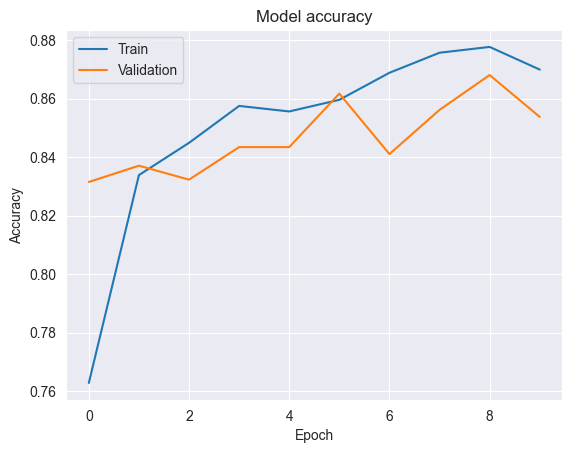

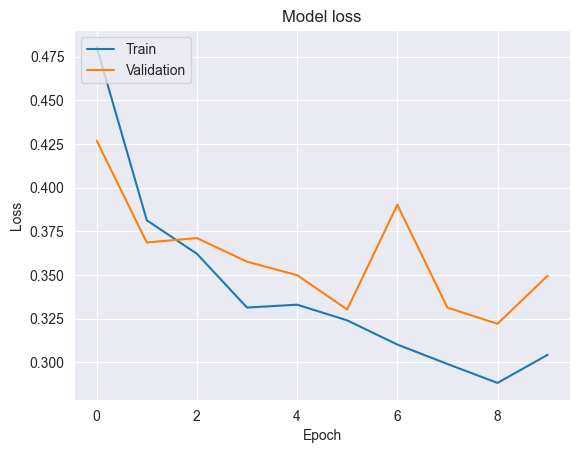

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step


In [35]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

      Benign       0.85      0.86      0.86       629
   Malignant       0.86      0.85      0.85       629

    accuracy                           0.86      1258
   macro avg       0.86      0.86      0.86      1258
weighted avg       0.86      0.86      0.86      1258



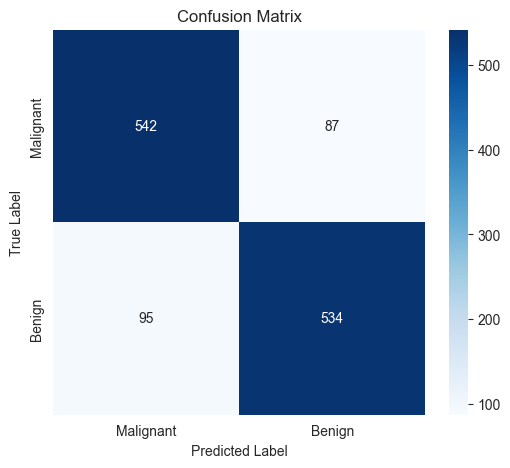

In [36]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
def create_cnn_model(input_shape):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, 
                            kernel_regularizer=regularizers.l2(0.001)))  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))  
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu', 
                            kernel_regularizer=regularizers.l2(0.001)))  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))  
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu', 
                            kernel_regularizer=regularizers.l2(0.001)))  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25)) 
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)))  
    model.add(layers.Dropout(0.5)) 
    model.add(layers.Dense(1, activation='sigmoid')) 

    return model

input_shape = (224, 224, 3)  
num_classes = 1  

cnn_model = create_cnn_model(input_shape)

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])

In [38]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 218s 344ms/step - accuracy: 0.6593 - loss: 0.9702 - val_accuracy: 0.7886 - val_loss: 0.5783
Epoch 2/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 212s 337ms/step - accuracy: 0.8206 - loss: 0.5098 - val_accuracy: 0.8275 - val_loss: 0.4819
Epoch 3/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 212s 336ms/step - accuracy: 0.8296 - loss: 0.4726 - val_accuracy: 0.8450 - val_loss: 0.4230
Epoch 4/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 212s 337ms/step - accuracy: 0.8328 - loss: 0.4520 - val_accuracy: 0.8052 - val_loss: 0.4367
Epoch 5/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 212s 336ms/step - accuracy: 0.8335 - loss: 0.4321 - val_accuracy: 0.8529 - val_loss: 0.4393


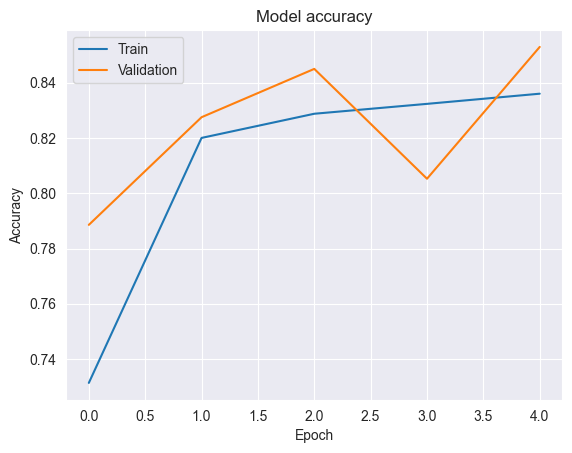

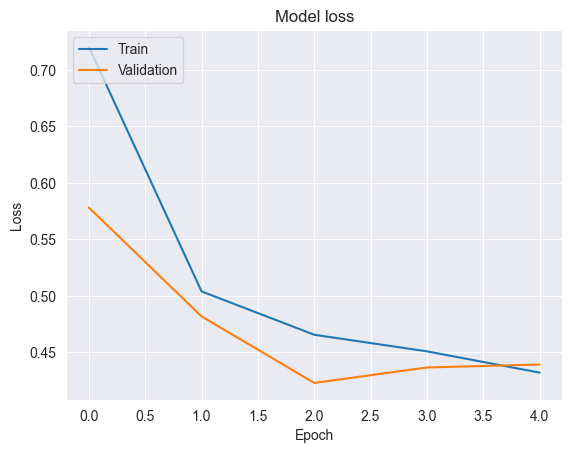

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step


In [41]:
report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

      Benign       0.88      0.65      0.75       629
   Malignant       0.72      0.91      0.81       629

    accuracy                           0.78      1258
   macro avg       0.80      0.78      0.78      1258
weighted avg       0.80      0.78      0.78      1258



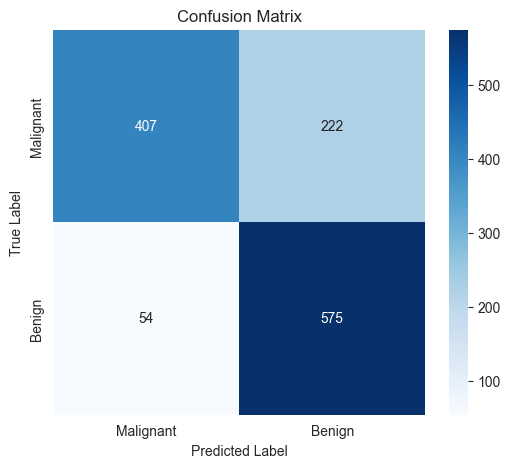

In [42]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [43]:
def create_xception_model(input_shape):
    
    base_model = Xception(weights='imagenet', input_shape=input_shape, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(GaussianNoise(0.25))  
    model.add(GlobalAveragePooling2D())  
    model.add(Dense(512, activation='relu'))  
    model.add(BatchNormalization()) 
    model.add(GaussianNoise(0.25))  
    model.add(Dropout(0.25))  
    model.add(Dense(1, activation='sigmoid'))  

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [44]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 431s 673ms/step - accuracy: 0.7793 - loss: 0.4949 - val_accuracy: 0.8665 - val_loss: 0.3233
Epoch 2/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 422s 671ms/step - accuracy: 0.8679 - loss: 0.3224 - val_accuracy: 0.8696 - val_loss: 0.3099
Epoch 3/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 994s 2s/step - accuracy: 0.8846 - loss: 0.2828 - val_accuracy: 0.8736 - val_loss: 0.2959
Epoch 4/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 602s 957ms/step - accuracy: 0.8781 - loss: 0.2872 - val_accuracy: 0.8768 - val_loss: 0.2985
Epoch 5/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 541s 860ms/step - accuracy: 0.8865 - loss: 0.2634 - val_accuracy: 0.8816 - val_loss: 0.2882
Epoch 6/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 420s 668ms/step - accuracy: 0.9028 - loss: 0.2399 - val_accuracy: 0.8633 - val_loss: 0.3310
Epoch 7/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 419s 666ms/step - accuracy: 0.9050 - loss: 0.2373 - val_accuracy: 0.8879 - val_loss: 0.2832
Epoch 8/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 440s 700ms/step - accuracy: 0.9177 - lo

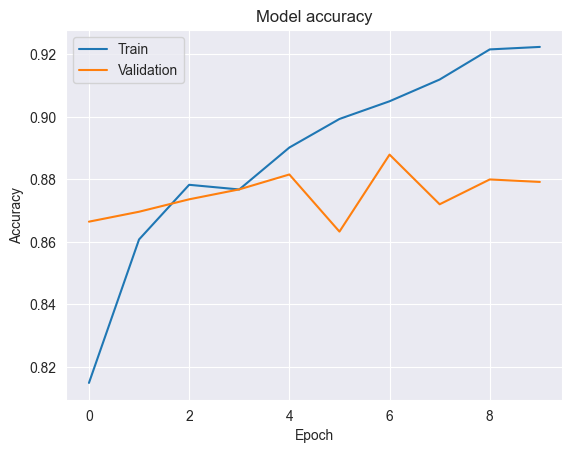

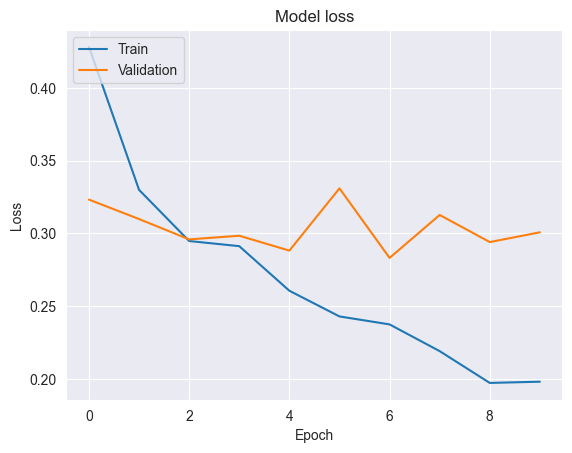

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [46]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

79/79 ━━━━━━━━━━━━━━━━━━━━ 52s 638ms/step


In [47]:
report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

      Benign       0.89      0.91      0.90       629
   Malignant       0.91      0.89      0.90       629

    accuracy                           0.90      1258
   macro avg       0.90      0.90      0.90      1258
weighted avg       0.90      0.90      0.90      1258



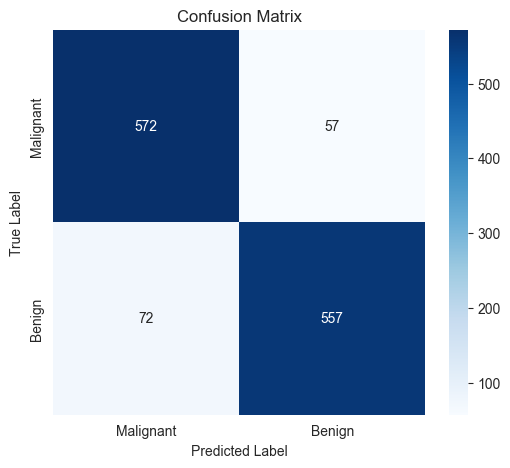

In [48]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [49]:
def create_inception_model(input_shape):
   
    base_model = InceptionV3(weights='imagenet', input_shape=input_shape, include_top=False)
    
   
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    
    model.add(GaussianNoise(0.25))  
    
    model.add(GlobalAveragePooling2D())  
    
    model.add(Dense(512, activation='relu'))  
    model.add(BatchNormalization())  
    model.add(GaussianNoise(0.25))  
    model.add(Dropout(0.25))  
    
    model.add(Dense(1, activation='sigmoid'))  

    return model

In [50]:
input_shape = (224, 224, 3)  
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])

In [51]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [52]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 257s 393ms/step - accuracy: 0.7765 - loss: 0.4995 - val_accuracy: 0.8529 - val_loss: 0.3470
Epoch 2/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 235s 374ms/step - accuracy: 0.8512 - loss: 0.3515 - val_accuracy: 0.8585 - val_loss: 0.3415
Epoch 3/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 248s 395ms/step - accuracy: 0.8615 - loss: 0.3260 - val_accuracy: 0.8553 - val_loss: 0.3416
Epoch 4/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 234s 371ms/step - accuracy: 0.8699 - loss: 0.3043 - val_accuracy: 0.8521 - val_loss: 0.3653
Epoch 5/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 232s 369ms/step - accuracy: 0.8786 - loss: 0.2897 - val_accuracy: 0.8672 - val_loss: 0.3288
Epoch 6/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 235s 374ms/step - accuracy: 0.8793 - loss: 0.2873 - val_accuracy: 0.8649 - val_loss: 0.3225
Epoch 7/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 240s 382ms/step - accuracy: 0.8876 - loss: 0.2616 - val_accuracy: 0.8712 - val_loss: 0.3334
Epoch 8/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 233s 371ms/step - accuracy: 0.8966 -

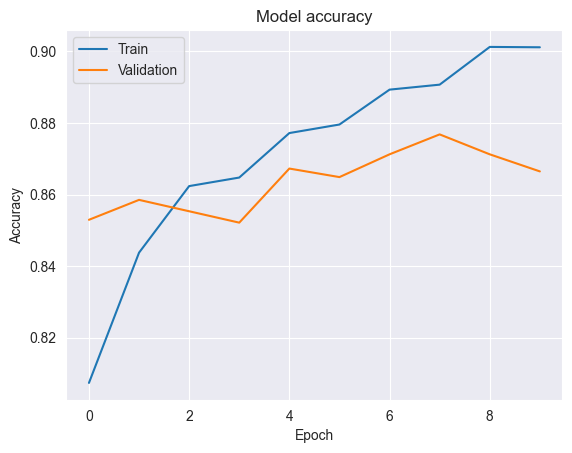

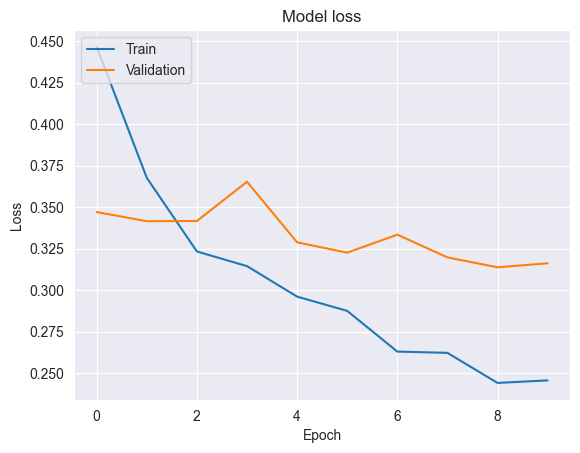

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [54]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 352ms/step


In [55]:
report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

      Benign       0.86      0.87      0.87       629
   Malignant       0.87      0.86      0.86       629

    accuracy                           0.87      1258
   macro avg       0.87      0.87      0.87      1258
weighted avg       0.87      0.87      0.87      1258



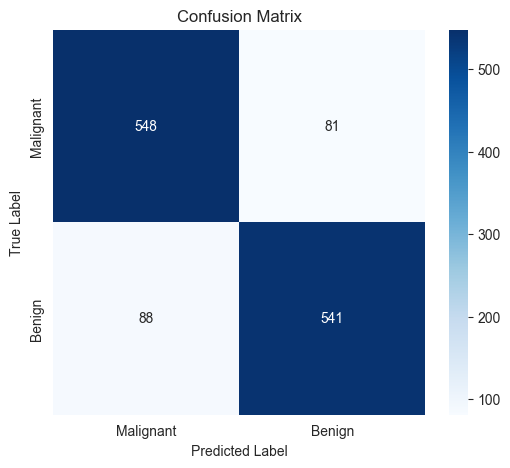

In [56]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [57]:
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

In [58]:
def predict_image(model, image_path):
    processed_img = preprocess_image(image_path)
    prediction = model.predict(processed_img)
    return prediction

In [60]:
image_path = 'melanoma-cancer-dataset/test/Malignant/5602.jpg'  
prediction = predict_image(cnn_model, image_path)

if prediction[0][0] >= 0.5:
    print(f"Prediction: Malignant ({prediction[0][0]:.2f} confidence)")
else:
    print(f"Prediction: Benign ({prediction[0][0]:.2f} confidence)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: Malignant (0.86 confidence)


In [61]:
def predict_image_with_time(model, image_path):
    processed_img = preprocess_image(image_path)
    start_time = time.time()
    prediction = model.predict(processed_img)
    end_time = time.time()
    prediction_time = end_time - start_time
    return prediction, prediction_time

In [62]:
image_path = 'melanoma-cancer-dataset/test/Malignant/5602.jpg'  
prediction, prediction_time = predict_image_with_time(cnn_model, image_path)

if prediction[0][0] >= 0.5:
    print(f"Prediction: Malignant ({prediction[0][0]:.2f} confidence)")
else:
    print(f"Prediction: Benign ({prediction[0][0]:.2f} confidence)")

print(f"Time taken for prediction: {prediction_time:.4f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction: Malignant (0.86 confidence)
Time taken for prediction: 0.1243 seconds


### 1. **CNN Model:**
- **Benign:**
  - Precision: 0.86
  - Recall: 0.88
  - F1-score: 0.87
- **Malignant:**
  - Precision: 0.88
  - Recall: 0.85
  - F1-score: 0.87
- **Overall Accuracy**: 0.87
- **Macro Avg/Weighted Avg F1-score**: 0.87

**Analysis**: The CNN model without regularization performs well with a balanced precision, recall, and f1-score for both classes. Overall, the accuracy is 87%, and the performance is consistent across metrics.

### 2. **CNN Model with Regularization:**
- **Benign:**
  - Precision: 0.91
  - Recall: 0.63
  - F1-score: 0.75
- **Malignant:**
  - Precision: 0.72
  - Recall: 0.94
  - F1-score: 0.81
- **Overall Accuracy**: 0.79
- **Macro Avg/Weighted Avg F1-score**: 0.78

**Analysis**: Adding regularization negatively impacted performance, especially for the **Benign** class, with a sharp decline in recall (0.63). The **Malignant** class benefits from improved recall but at the cost of reduced precision. Overall, accuracy and f1-scores dropped to 79%, indicating a potential imbalance in how the model is generalizing across classes.

### 3. **Xception Model:**
- **Benign:**
  - Precision: 0.86
  - Recall: 0.93
  - F1-score: 0.89
- **Malignant:**
  - Precision: 0.92
  - Recall: 0.85
  - F1-score: 0.88
- **Overall Accuracy**: 0.89
- **Macro Avg/Weighted Avg F1-score**: 0.89

**Analysis**: The Xception model shows strong performance with high precision and recall for both **Benign** and **Malignant** classes. Accuracy of 89% and balanced f1-scores indicate good generalization. This is a clear improvement over both the CNN and the regularized CNN models.

### 4. **Inception Model:**
- **Benign:**
  - Precision: 0.90
  - Recall: 0.87
  - F1-score: 0.89
- **Malignant:**
  - Precision: 0.88
  - Recall: 0.90
  - F1-score: 0.89
- **Overall Accuracy**: 0.89
- **Macro Avg/Weighted Avg F1-score**: 0.89

**Analysis**: The Inception model performs similarly to Xception, with 89% accuracy and nearly equal precision, recall, and f1-scores across both classes. This model strikes a good balance between both **Benign** and **Malignant** detection.

### **Conclusion:**
- The **CNN with regularization** struggled with class imbalance, especially for the **Benign** class.
- **Xception and Inception** models achieved the best performance, with both reaching 89% accuracy and well-balanced precision, recall, and f1-scores.
- Between **Xception and Inception**, the performance is very close, and either model could be chosen based on other factors like computational efficiency or ease of deployment.

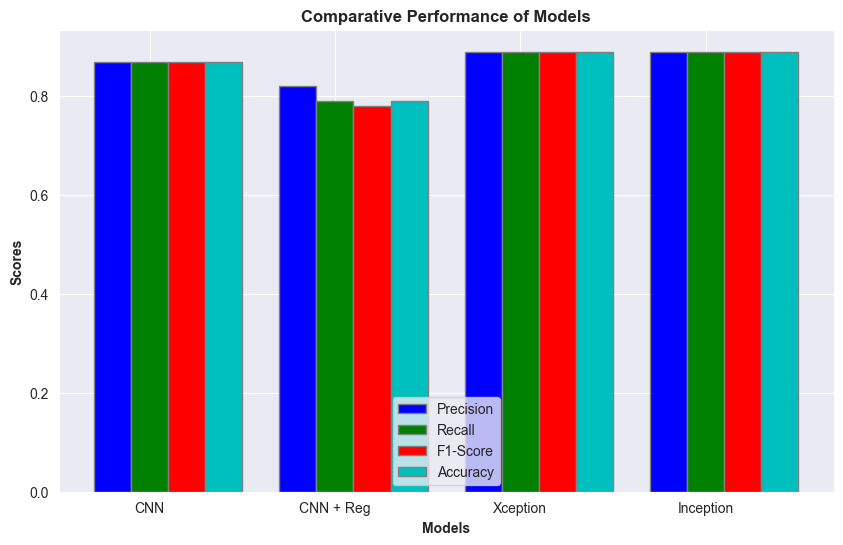

In [63]:
models = ['CNN', 'CNN + Reg', 'Xception', 'Inception']
precision = [0.87, 0.82, 0.89, 0.89]
recall = [0.87, 0.79, 0.89, 0.89]
f1_score = [0.87, 0.78, 0.89, 0.89]
accuracy = [0.87, 0.79, 0.89, 0.89]

bar_width = 0.2

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(10, 6))
plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-Score')
plt.bar(r4, accuracy, color='c', width=bar_width, edgecolor='grey', label='Accuracy')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Comparative Performance of Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

plt.legend()

plt.show()